109/109 [==============================] - 3s 14ms/step
RMSE: 20.002583819500494


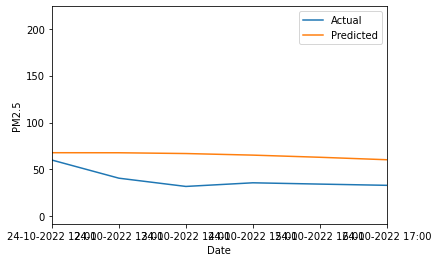

In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load the dataset
df = pd.read_csv('Data/kurla_cleaned.csv')
# df=df.drop(df[['Date']],axis=1)
# Select the feature to be predicted
target_col = 'PM2.5'

# Normalize the dataset
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[target_col].values.reshape(-1, 1))

# Split the dataset into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size:, :]

# Create the input and output sequences for the LSTM model
def create_dataset(data, lookback):
    X, y = [], []
    for i in range(len(data)-lookback-1):
        X.append(data[i:(i+lookback), 0])
        y.append(data[(i+lookback), 0])
    return np.array(X), np.array(y)

lookback = 24 # number of hours to look back
X_train, y_train = create_dataset(train_data, lookback)
X_test, y_test = create_dataset(test_data, lookback)

# Reshape the input sequences for LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=1, batch_size=64)

# Predict the PM2.5 levels for the test set
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)

# Plot the predicted vs actual PM2.5 levels
# import matplotlib.pyplot as plt

# plt.plot(y_test, label='Actual')
# plt.plot(y_pred, label='Predicted')

# plt.legend()
# fig, ax = plt.subplots(figsize=(10, 5))

# ax.plot(y_test[3000:3500], label='Actual')
# ax.plot(y_pred[3000:3500], label='Predicted')
# ax.set_xlim(400, 500)  # set x-axis limit to show only the first 100 data points

# ax.set_xlabel('Hours')
# ax.set_ylabel('PM2.5 levels')
# ax.legend()
# plt.show()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense


data = pd.read_csv('kurla_cleaned.csv', parse_dates=['Date'], index_col='Date')
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
# Split data into training and test sets
train_size = int(len(scaled_data) * 0.90)
train, test = scaled_data[:train_size], scaled_data[train_size:]
# Function to create input-output pairs for LSTM model
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back)])
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)
look_back = 24
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 12))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 12))
# Create LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 12)))
model.add(Dense(12))
model.compile(loss='mean_squared_error', optimizer='adam')
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=2, shuffle=False)


Epoch 1/5
247/247 - 13s - loss: 0.0291 - val_loss: 0.0327 - 13s/epoch - 51ms/step
Epoch 2/5
247/247 - 6s - loss: 0.0199 - val_loss: 0.0224 - 6s/epoch - 22ms/step
Epoch 3/5
247/247 - 5s - loss: 0.0154 - val_loss: 0.0185 - 5s/epoch - 22ms/step
Epoch 4/5
247/247 - 6s - loss: 0.0124 - val_loss: 0.0169 - 6s/epoch - 22ms/step
Epoch 5/5
247/247 - 6s - loss: 0.0103 - val_loss: 0.0160 - 6s/epoch - 23ms/step
